# Data Analysis and Visualization Exercises

In this exercise, you will work with a dataset containing information about job seekers and their profiles. Your tasks will involve:

1. **Univariate Analysis**: Analyze the distribution of individual variables.
2. **Bivariate Analysis**: Explore the relationships between two variables.
3. **Data Wrangling**: Handle missing data, outliers, and feature engineering.
4. **Data Preprocessing**: Apply encoding, scaling, and other preprocessing techniques to the data.
5. **Advanced Feature Engineering**: Create and engineer complex features.

### Dataset: aug_train.csv
The dataset contains the following columns:

- **enrollee_id**: Unique ID for each enrollee.
- **city**: Code of the city the enrollee is from.
- **city_development_index**: Development index score of the city.
- **gender**: Gender of the enrollee.
- **relevent_experience**: Whether the enrollee has relevant work experience.
- **enrolled_university**: The type of university enrollment (if any).
- **education_level**: Highest education level of the enrollee.
- **major_discipline**: Main discipline studied.
- **experience**: Total years of work experience.
- **company_size**: Size of the company the enrollee works for.
- **company_type**: Type of company.
- **last_new_job**: The time since the last job change.
- **training_hours**: Total number of training hours completed.
- **target**: Whether the enrollee is looking for a job change (1 = Yes, 0 = No).

Let's get started!

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('aug_train.csv')

# Display first few rows of the dataset
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0


## Univariate Analysis

### Task 1: Plot the distribution of numeric variables
- Use histograms to explore the distribution of the following numeric columns:
    - `city_development_index`
    - `training_hours`

```python
# Example: Histogram for city_development_index
plt.figure(figsize=(8, 6))
sns.histplot(df['city_development_index'])
plt.title('City Development Index Distribution')
plt.show()
```

### Task 2: Plot the distribution of categorical variables
- Use count plots to explore the distribution of these categorical columns:
    - `gender`
    - `education_level`
    - `company_size`

```python
# Example: plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()
```

### Task 3: Explore outliers
- Use boxplots to check for outliers in the numeric variables.
    - `city_development_index`
    - `training_hours`

```python
# Example: Boxplot for training_hours
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['training_hours'])
plt.title('Boxplot of Training Hours')
plt.show()
```

## Bivariate Analysis

### Task 4: Explore relationships between variables
- Use scatter plots and correlation heatmaps to explore the relationships between pairs of variables.

#### Examples:
1. Explore the relationship between `city_development_index` and `training_hours`.
2. Analyze the relationship between `experience` and `city_development_index`.

```python
# Example: Scatter plot between city_development_index and training_hours
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city_development_index', y='training_hours', data=df)
plt.title('City Development Index vs Training Hours')
plt.show()
```

### Task 5: Boxplot analysis
- Explore the distribution of `training_hours` across different levels of `education_level`.
- Investigate the variation of `city_development_index` across `company_size`.

```python
# Example: Boxplot for training_hours by education_level
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='training_hours', data=df)
plt.title('Training Hours by Education Level')
plt.show()
```

### Task 6: Correlation Heatmap
- Visualize the correlation between numeric variables in the dataset.

```python
# Example: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
```

## Data Wrangling

### Task 7: Handle Missing Data
- Identify columns with missing values and apply appropriate techniques.

```python
# Example: Checking for missing values
missing_data = df.isnull().sum()
missing_data[missing_data > 0]
```

### Task 8: Handle outliers
- Remove or treat outliers in the `training_hours` and `city_development_index` columns.

```python
# Example: Removing outliers in training_hours
q1 = df['training_hours'].quantile(0.25)
q3 = df['training_hours'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df[(df['training_hours'] >= lower_bound) & (df['training_hours'] <= upper_bound)]
```
For visualizing:


# Creating the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Set general plot properties for consistency
sns.set(style="whitegrid")

# Boxplot before outlier removal
sns.boxplot(data=df, y='training_hours', color='lightblue', ax=axes[0], width=0.3)
axes[0].set_title('Before Outlier Removal', fontsize=14)
axes[0].set_ylabel('Training Hours', fontsize=12)
axes[0].set_xlabel('')
axes[0].annotate('Outliers are shown as points',
                 xy=(0.4, df['training_hours'].max()),
                 xytext=(0.6, df['training_hours'].max() + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='black')

# Boxplot after outlier removal
sns.boxplot(data=df_cleaned, y='training_hours', color='lightgreen', ax=axes[1], width=0.3)
axes[1].set_title('After Outlier Removal', fontsize=14)
axes[1].set_ylabel('')  # No y-axis label for second plot for cleanliness
axes[1].set_xlabel('')

# Adding annotations and improving the visualization
axes[0].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')
axes[0].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')

axes[1].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')
axes[1].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')

# Setting consistent y-axis limits
axes[0].set_ylim([df['training_hours'].min() - 10, df['training_hours'].max() + 20])

# Show the plot
plt.tight_layout()
plt.show()









### Task 9: Feature Engineering
- Create new features from existing columns (e.g., categorize experience into groups).
- Use `pd.cut()` or `pd.qcut()` for binning continuous variables.

pd.cut() results in bins of equal range but not necessarily equal numbers of data points.

pd.qcut() results in bins with an equal number of data points but not necessarily equal range.

```python
# Example: Categorize experience into groups
df['experience_group'] = pd.cut(df['experience'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '6-10', '11-15', '16-20', '21-25'])
```


## Data Preprocessing

### Task 10: Encoding Categorical Variables
- Convert categorical variables to numeric using encoding methods such as:
    - One-hot encoding
    - Label encoding

```python
# Example: One-hot encoding for gender
df_encoded = pd.get_dummies(df, columns=['gender'])
df_encoded.head()
```

### Task 11: Scaling Features
- Apply feature scaling to numeric columns such as `city_development_index` and `training_hours`.

```python
# Example: Standard scaling of numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['city_development_index', 'training_hours']] = scaler.fit_transform(df_scaled[['city_development_index', 'training_hours']])
```


## Advanced Feature Engineering

### Task 12: Feature interactions
- Create interaction features between `city_development_index` and `training_hours`.

```python
# Example: Interaction term
df['city_training_interaction'] = df['city_development_index'] * df['training_hours']
```


# Univariate Analysis



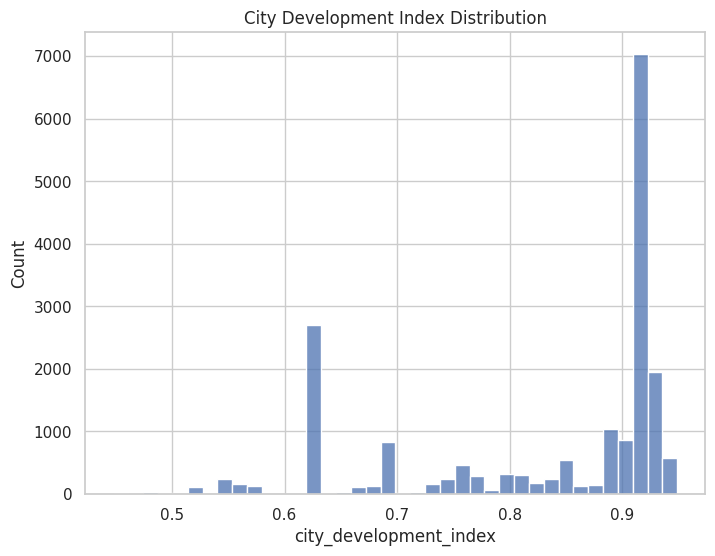

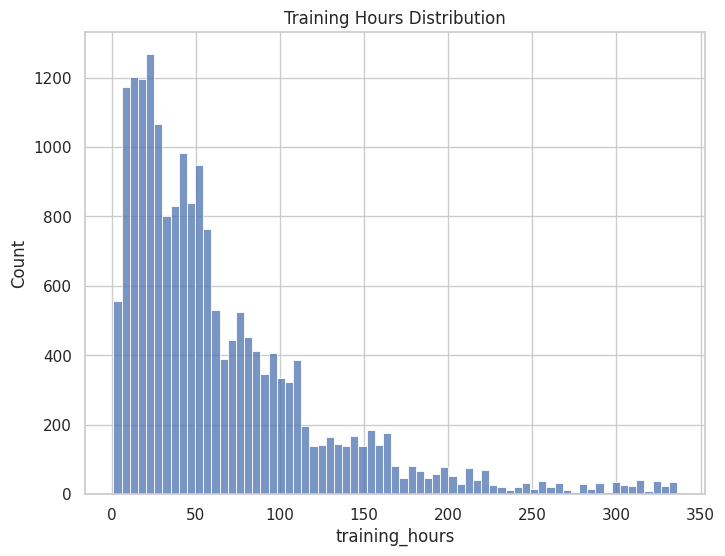

In [19]:
# ### Task 1: Plot the distribution of numeric variables
plt.figure(figsize=(8, 6))
sns.histplot(df['city_development_index'])
plt.title('City Development Index Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['training_hours'])
plt.title('Training Hours Distribution')
plt.show()


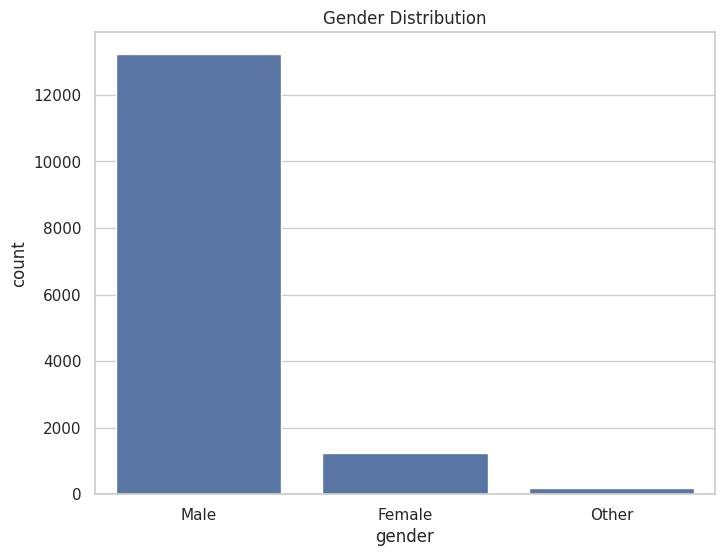

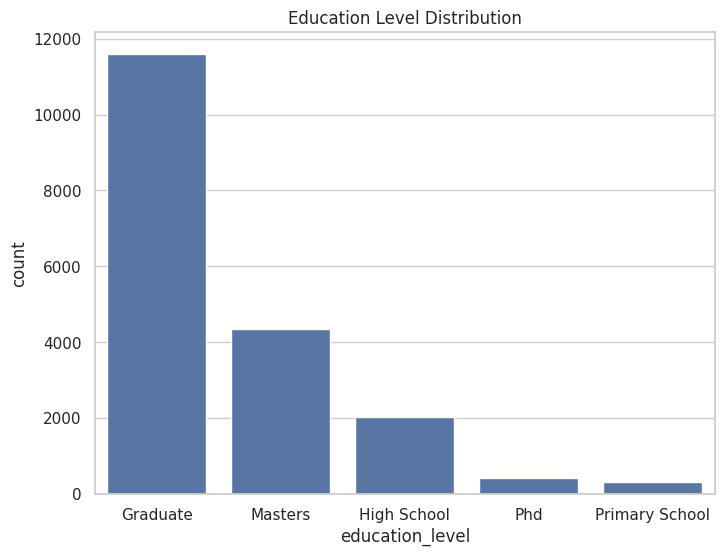

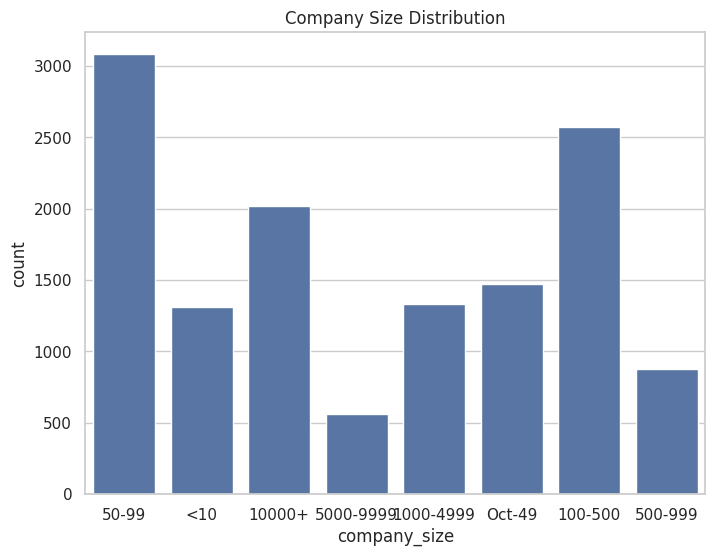

In [18]:
# ### Task 2: Plot the distribution of categorical variables
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='education_level', data=df)
plt.title('Education Level Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='company_size', data=df)
plt.title('Company Size Distribution')
plt.show()


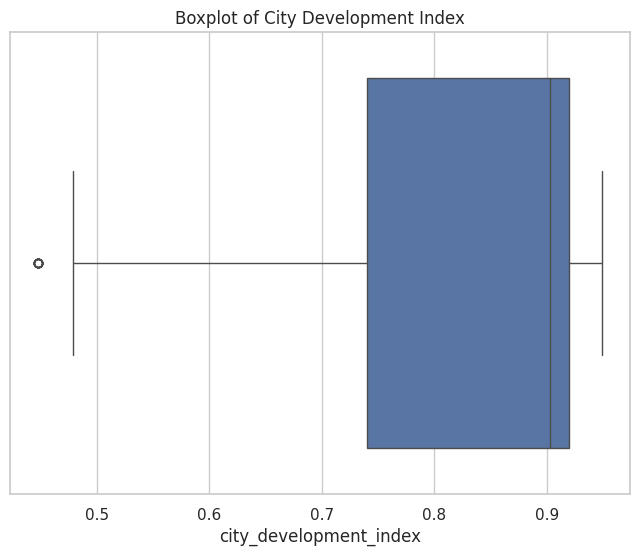

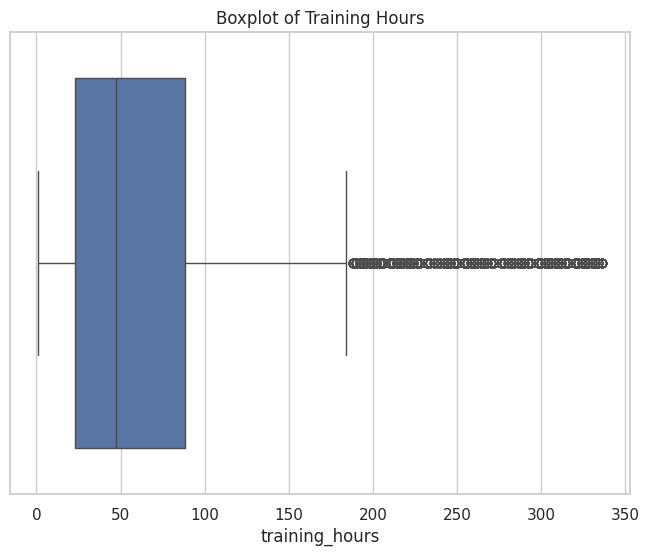

In [17]:
# ### Task 3: Explore outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['city_development_index'])
plt.title('Boxplot of City Development Index')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['training_hours'])
plt.title('Boxplot of Training Hours')
plt.show()



# Bivariate Analysis



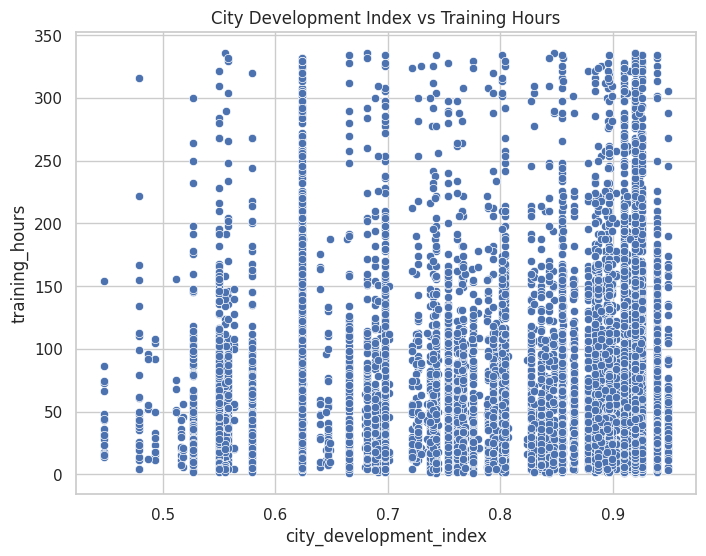

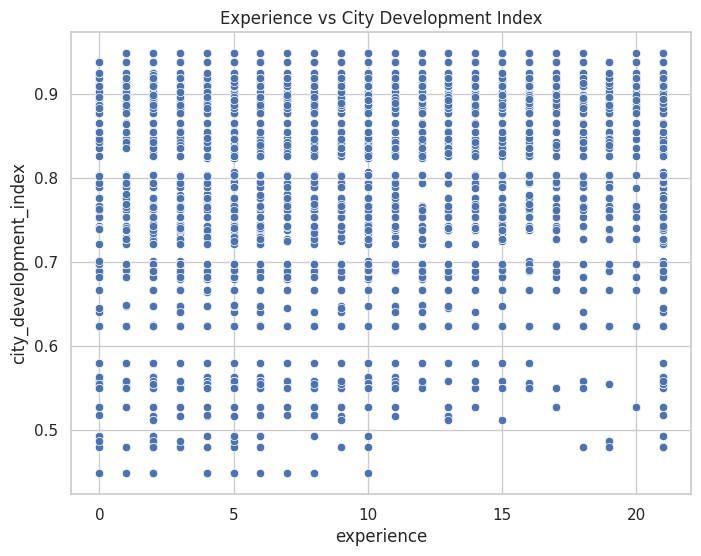

In [15]:
# ### Task 4: Explore relationships between variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city_development_index', y='training_hours', data=df)
plt.title('City Development Index vs Training Hours')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='experience', y='city_development_index', data=df)
plt.title('Experience vs City Development Index')
plt.show()


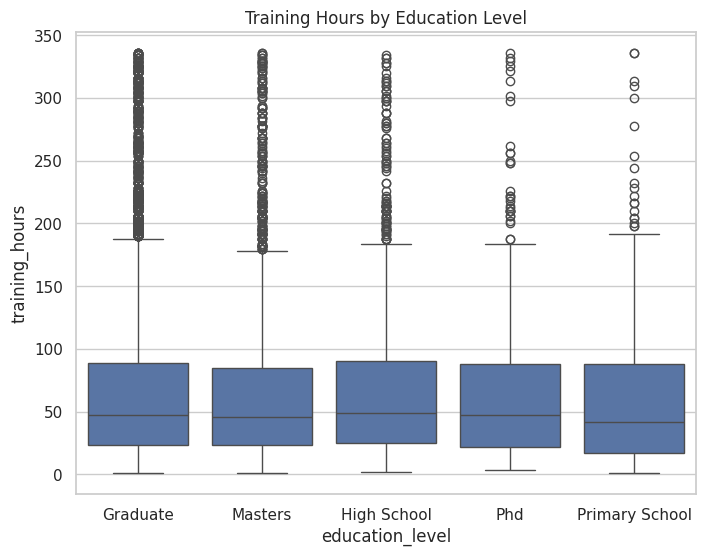

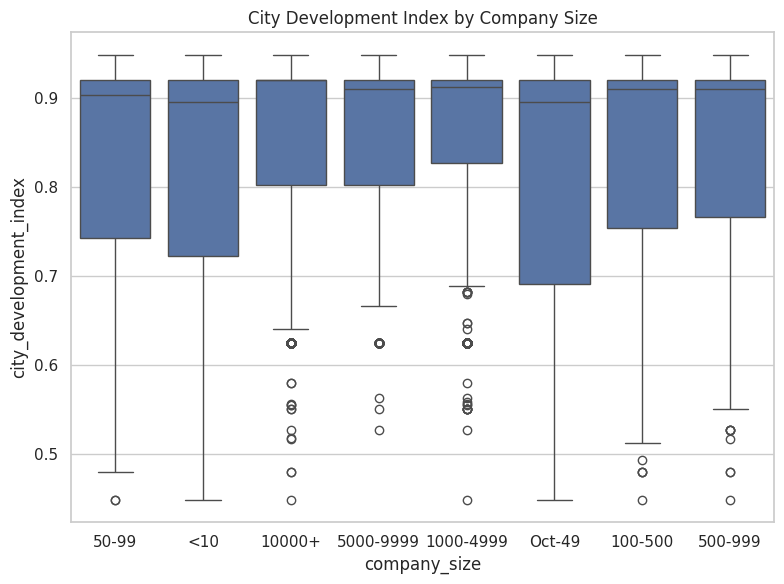

In [14]:
# ### Task 5: Boxplot analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='training_hours', data=df)
plt.title('Training Hours by Education Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='city_development_index', data=df)
plt.title('City Development Index by Company Size')
plt.show()


In [20]:
df[df.dtypes[df.dtypes != 'object'].index]

,enrollee_id,city_development_index,experience,training_hours,target
0,8949,0.920,21.0,36,1
1,29725,0.776,15.0,47,0
2,11561,0.624,5.0,83,0
3,33241,0.789,0.0,52,1
4,666,0.767,21.0,8,0
...,...,...,...,...,...
19153,7386,0.878,14.0,42,1
19154,31398,0.920,14.0,52,1
19155,24576,0.920,21.0,44,0
19156,5756,0.802,0.0,97,0


In [ ]:
# so we will take only 'city_development_index'	'experience'	'training_hours'

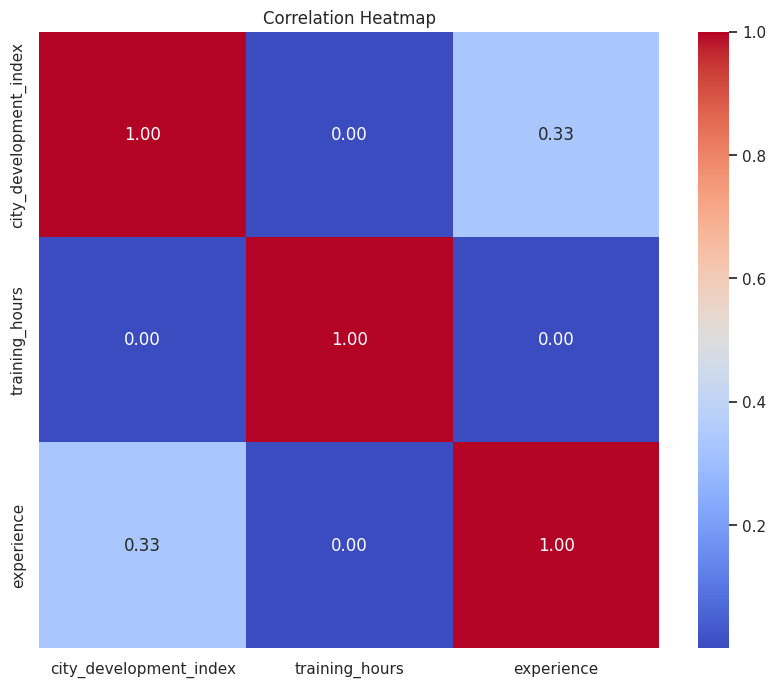

In [7]:
# ### Task 6: Correlation Heatmap
df_corr = df[['city_development_index', 'training_hours', 'experience']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Data Wrangling



In [38]:
# ### Task 7: Handle Missing Data
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

# get isnull on all columns
missing_data.isnull().sum()

0

In [24]:
# ### Task 8: Handle outliers
q1 = df['training_hours'].quantile(0.25)
q3 = df['training_hours'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df[(df['training_hours'] >= lower_bound) & (df['training_hours'] <= upper_bound)]

q1 = df['city_development_index'].quantile(0.25)
q3 = df['city_development_index'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df[(df['city_development_index'] >= lower_bound) & (df['city_development_index'] <= upper_bound)]


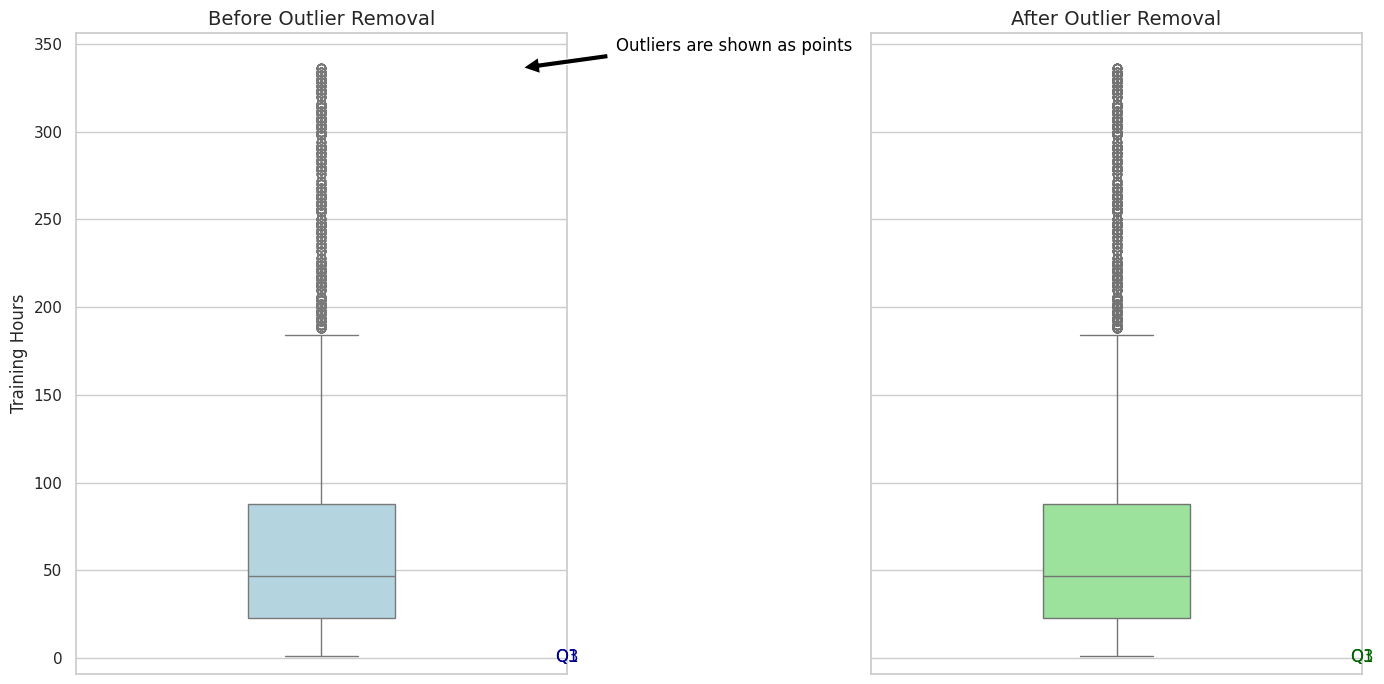

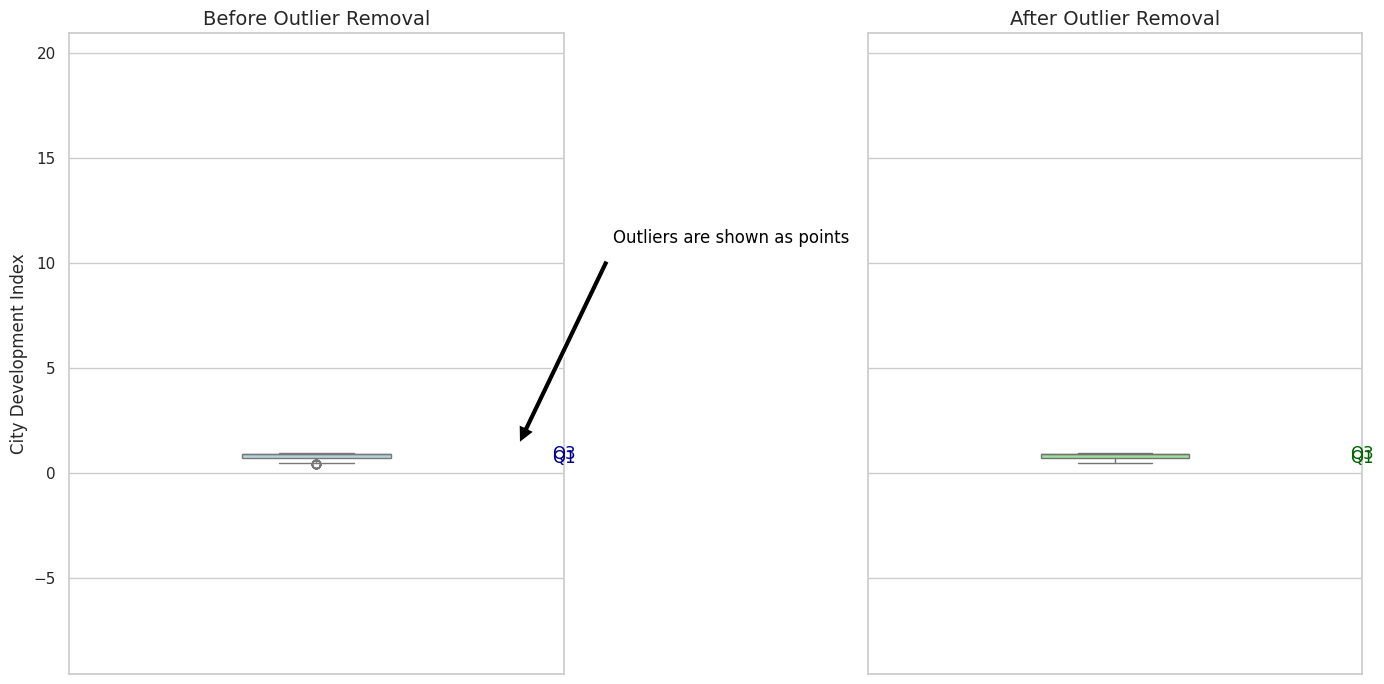

In [27]:
# For visualizing:
# Creating the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Set general plot properties for consistency
sns.set(style="whitegrid")

# Boxplot before outlier removal
sns.boxplot(data=df, y='training_hours', color='lightblue', ax=axes[0], width=0.3)
axes[0].set_title('Before Outlier Removal', fontsize=14)
axes[0].set_ylabel('Training Hours', fontsize=12)
axes[0].set_xlabel('')
axes[0].annotate('Outliers are shown as points',
                 xy=(0.4, df['training_hours'].max()),
                 xytext=(0.6, df['training_hours'].max() + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='black')

# Boxplot after outlier removal
sns.boxplot(data=df_cleaned, y='training_hours', color='lightgreen', ax=axes[1], width=0.3)
axes[1].set_title('After Outlier Removal', fontsize=14)
axes[1].set_ylabel('')  # No y-axis label for second plot for cleanliness
axes[1].set_xlabel('')

# Adding annotations and improving the visualization
axes[0].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')
axes[0].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')

axes[1].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')
axes[1].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')

# Setting consistent y-axis limits
axes[0].set_ylim([df['training_hours'].min() - 10, df['training_hours'].max() + 20])

# Show the plot
plt.tight_layout()
plt.show()

# ####

# Creating the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Set general plot properties for consistency
sns.set(style="whitegrid")

# Boxplot before outlier removal
sns.boxplot(data=df, y='city_development_index', color='lightblue', ax=axes[0], width=0.3)
axes[0].set_title('Before Outlier Removal', fontsize=14)
axes[0].set_ylabel('City Development Index', fontsize=12)
axes[0].set_xlabel('')
axes[0].annotate('Outliers are shown as points',
                 xy=(0.4, df['city_development_index'].max()),
                 xytext=(0.6, df['city_development_index'].max() + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='black')

# Boxplot after outlier removal
sns.boxplot(data=df_cleaned, y='city_development_index', color='lightgreen', ax=axes[1], width=0.3)
axes[1].set_title('After Outlier Removal', fontsize=14)
axes[1].set_ylabel('')  # No y-axis label for second plot for cleanliness
axes[1].set_xlabel('')

# Adding annotations and improving the visualization
axes[0].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')
axes[0].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkblue')

axes[1].text(0.5, q1, 'Q1', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')
axes[1].text(0.5, q3, 'Q3', horizontalalignment='center', verticalalignment='center', fontsize=12, color='darkgreen')

# Setting consistent y-axis limits
axes[0].set_ylim([df['city_development_index'].min() - 10, df['city_development_index'].max() + 20])

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
# ### Task 9: Feature Engineering
df['experience_group'] = pd.cut(df['experience'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '6-10', '11-15', '16-20', '21-25'])
df['experience_group']


,experience_group
0,21-25
1,11-15
2,0-5
3,NaN
4,21-25
...,...
19153,11-15
19154,11-15
19155,21-25
19156,NaN


In [36]:
df['experience_group_q'] = pd.qcut(df['experience'], q=5, labels=['G1', 'G2', 'G3', 'G4', 'G5'])
df['experience_group_q']


,experience_group_q
0,G5
1,G4
2,G2
3,G1
4,G5
...,...
19153,G4
19154,G4
19155,G5
19156,G1


# Data Preprocessing



In [23]:
# ### Task 10: Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=['gender'])
df_encoded.head()


,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_group,gender_Female,gender_Male,gender_Other
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36,1,21-25,False,True,False
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0,11-15,False,True,False
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0,0-5,False,False,False
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,1,NaN,False,False,False
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0,21-25,False,True,False


In [30]:
from sklearn.preprocessing import LabelEncoder
# ### Task 10: Encoding Categorical Variables
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['education_level'] = label_encoder.fit_transform(df['education_level'])
df_encoded.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_group,experience_group_q
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,21.0,NaN,NaN,1,36,1,21-25,Q5
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0,11-15,Q4
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,0,STEM,5.0,NaN,NaN,never,83,0,0-5,Q2
3,33241,city_115,0.789,NaN,No relevent experience,NaN,0,Business Degree,0.0,NaN,Pvt Ltd,never,52,1,NaN,Q1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,2,STEM,21.0,50-99,Funded Startup,4,8,0,21-25,Q5


In [33]:
from sklearn.preprocessing import StandardScaler
# ### Task 11: Scaling Features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['city_development_index', 'training_hours']] = scaler.fit_transform(df_scaled[['city_development_index', 'training_hours']])
df_scaled[['city_development_index', 'training_hours']].head()

,city_development_index,training_hours
0,0.738919,-0.488985
1,-0.428410,-0.305825
2,-1.660590,0.293607
3,-0.323026,-0.222571
4,-0.501368,-0.955209


In [35]:
# ## Advanced Feature Engineering

# ### Task 12: Feature interactions
df['city_training_interaction'] = df['city_development_index'] * df['training_hours']
df[['city_development_index', 'training_hours', 'city_training_interaction']].head()

,city_development_index,training_hours,city_training_interaction
0,0.920,36,33.120
1,0.776,47,36.472
2,0.624,83,51.792
3,0.789,52,41.028
4,0.767,8,6.136
